In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import io



In [4]:
dataset = pd.read_csv('cause_of_deaths.csv')

In [5]:
dataset.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [6]:
# :1 Average deaths per condition 
specific_country_data = dataset[(dataset['Country/Territory'] == 'United States') & (dataset['Year'] == 2010)]


In [7]:
average_deaths = dataset.mean(numeric_only=True)
print("Average Deaths per Condition:\n", average_deaths)

Average Deaths per Condition:
 Year                                           2004.500000
Meningitis                                     1719.701307
Alzheimer's Disease and Other Dementias        4864.189379
Parkinson's Disease                            1173.169118
Nutritional Deficiencies                       2253.600000
Malaria                                        4140.960131
Drowning                                       1683.333170
Interpersonal Violence                         2083.797222
Maternal Disorders                             1262.589216
HIV/AIDS                                       5941.898529
Drug Use Disorders                              434.006699
Tuberculosis                                   7491.928595
Cardiovascular Diseases                       73160.454575
Lower Respiratory Infections                  13687.914706
Neonatal Disorders                            12558.942647
Alcohol Use Disorders                           787.421242
Self-harm                

In [8]:
# Bar Graph for Average Deaths per Condition

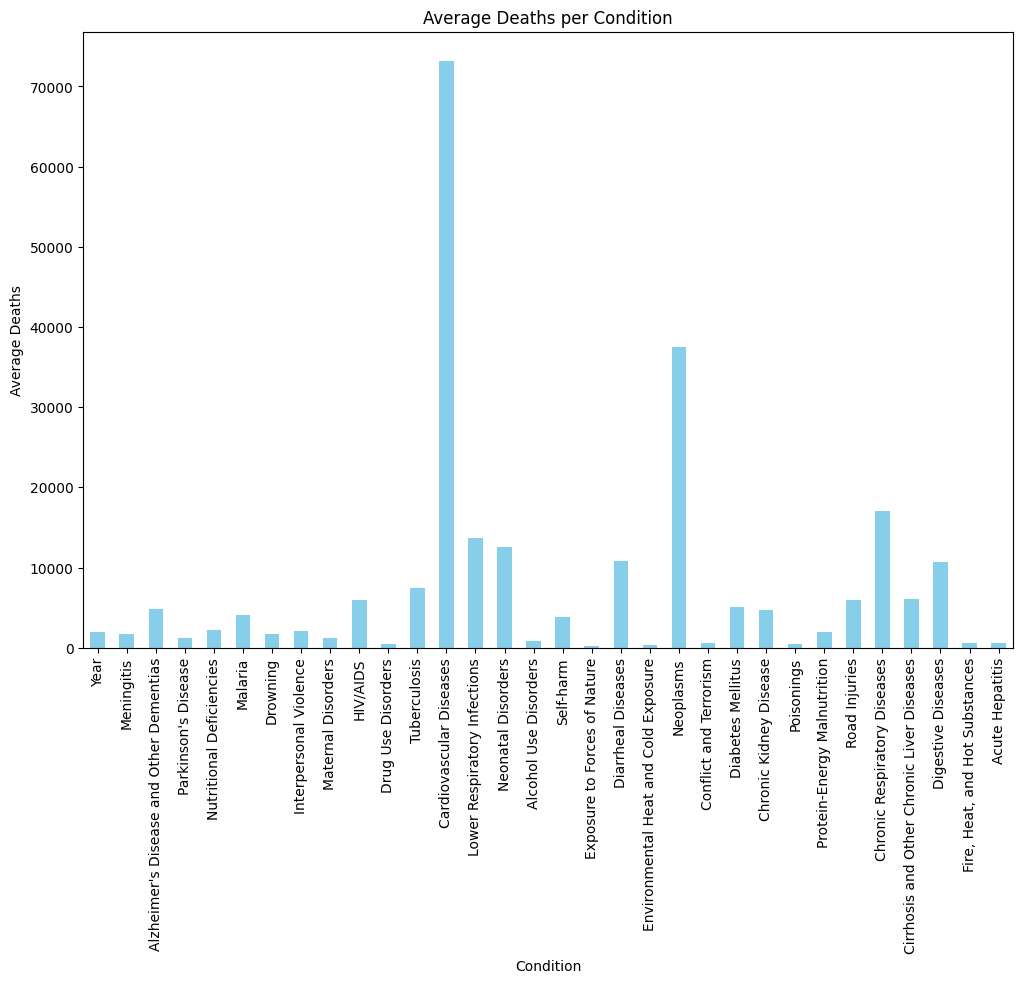

In [9]:
plt.figure(figsize=(12, 8))
average_deaths.plot(kind='bar', color='skyblue')
plt.title('Average Deaths per Condition')
plt.xlabel('Condition')
plt.ylabel('Average Deaths')
plt.xticks(rotation=90)
plt.show()

In [10]:
# :2 max deaths per condition
max_deaths = dataset.iloc[:, 3:].idxmax()
min_deaths = dataset.iloc[:, 3:].idxmin()
max_deaths_values = dataset.iloc[:, 3:].max()
min_deaths_values = dataset.iloc[:, 3:].min()
max_deaths_info = pd.DataFrame({'Max Country': max_deaths, 'Max Deaths': max_deaths_values})
min_deaths_info = pd.DataFrame({'Min Country': min_deaths, 'Min Deaths': min_deaths_values})
print("Maximum Deaths per Condition:\n", max_deaths_info)
print("Minimum Deaths per Condition:\n", min_deaths_info)

Maximum Deaths per Condition:
                                             Max Country  Max Deaths
Meningitis                                         2436       98358
Alzheimer's Disease and Other Dementias            1139      320715
Parkinson's Disease                                1139       76990
Nutritional Deficiencies                           2436      268223
Malaria                                            3871      280604
Drowning                                           1120      153773
Interpersonal Violence                              776       69640
Maternal Disorders                                 2438      107929
HIV/AIDS                                           5026      305491
Drug Use Disorders                                 5849       65717
Tuberculosis                                       2438      657515
Cardiovascular Diseases                            1139     4584273
Lower Respiratory Infections                       2436      690913
Neonatal Disorder

Comparison of Cardiovascular Diseases and Neoplasms:
        Cardiovascular Diseases     Neoplasms
count             6.120000e+03  6.120000e+03
mean              7.316045e+04  3.754224e+04
std               2.915775e+05  1.615584e+05
min               4.000000e+00  1.000000e+00
25%               2.028000e+03  8.097500e+02
50%               1.174200e+04  5.629500e+03
75%               4.254650e+04  2.014775e+04
max               4.584273e+06  2.716551e+06


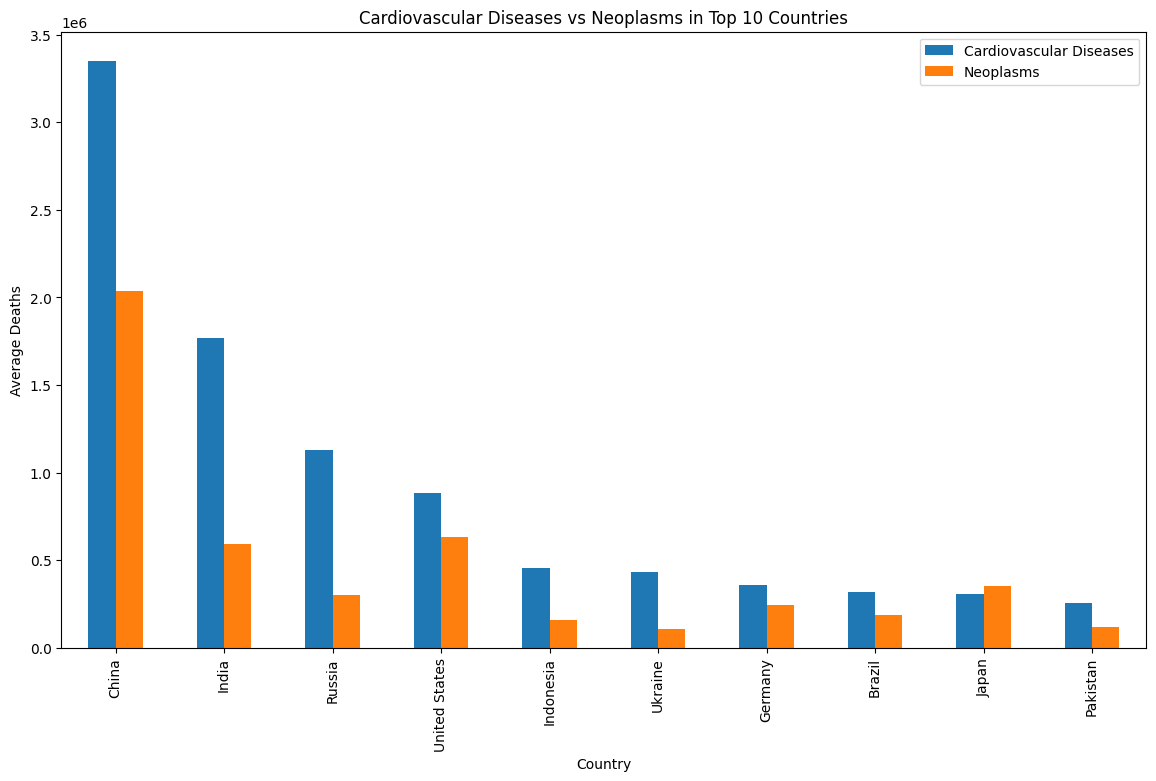

In [11]:
# 3: camparison of cardiovascular disease and Neoplasmas
comparison = dataset[['Country/Territory', 'Cardiovascular Diseases', 'Neoplasms']]
print("Comparison of Cardiovascular Diseases and Neoplasms:\n", comparison.describe())

# Bar Graph for Cardiovascular Diseases vs Neoplasms
comparison_plot = comparison.groupby('Country/Territory').mean().sort_values(by='Cardiovascular Diseases', ascending=False).head(10)
comparison_plot.plot(kind='bar', figsize=(14, 8))
plt.title('Cardiovascular Diseases vs Neoplasms in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Deaths')
plt.xticks(rotation=90)
plt.show()

In [12]:
# 4:top ten deseases


In [13]:
cause_columns = dataset.columns[3:]  # Selecting all cause of death columns (excluding Country, Code, Year)
cause_death_counts = dataset[cause_columns].sum()
ranked_causes = cause_death_counts.sort_values(ascending=False)
top_ten_causes = ranked_causes.head(10)
print(top_ten_causes)


Cardiovascular Diseases                       447741982
Neoplasms                                     229758538
Chronic Respiratory Diseases                  104605334
Lower Respiratory Infections                   83770038
Neonatal Disorders                             76860729
Diarrheal Diseases                             66235508
Digestive Diseases                             65638635
Tuberculosis                                   45850603
Cirrhosis and Other Chronic Liver Diseases     37479321
HIV/AIDS                                       36364419
dtype: int64


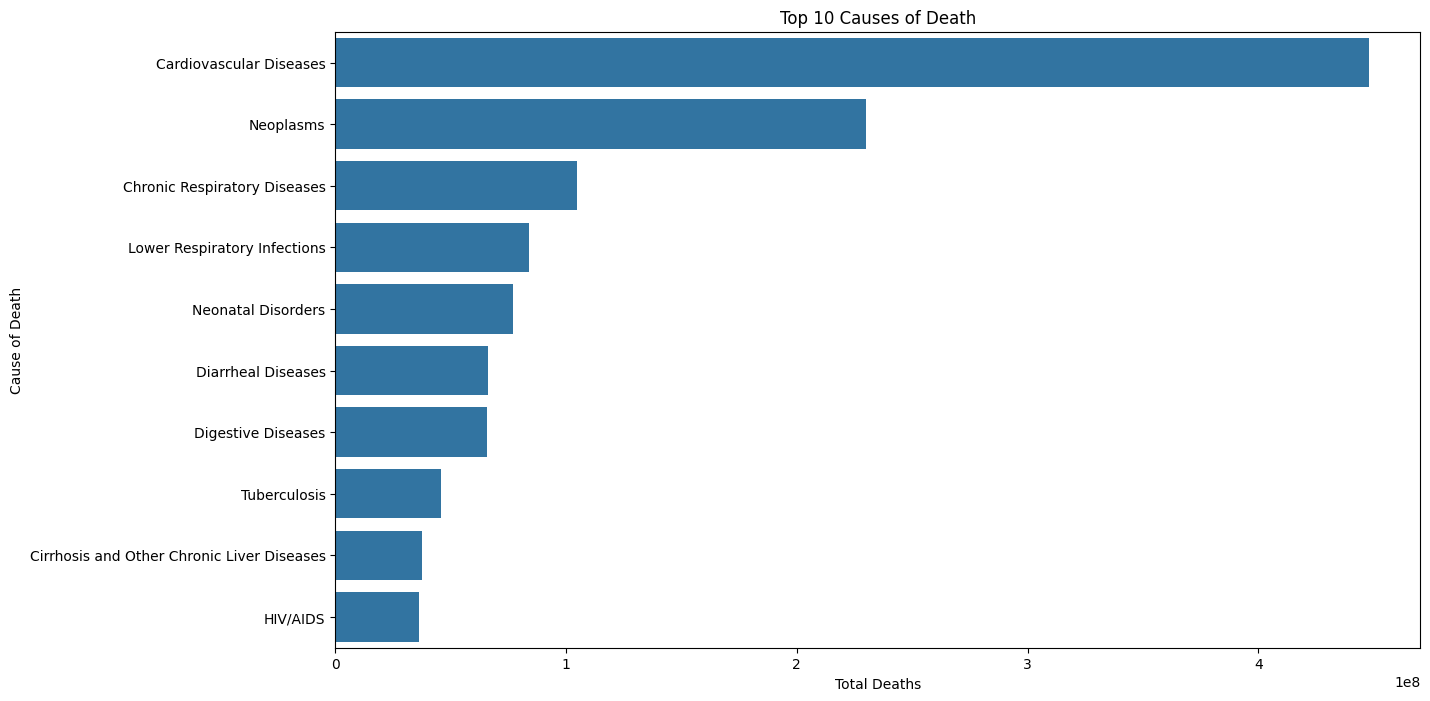

In [14]:
# Plotting the Bar Graph
plt.figure(figsize=(14, 8))
sns.barplot(x=top_ten_causes.values, y=top_ten_causes.index)
plt.title('Top 10 Causes of Death')
plt.xlabel('Total Deaths')
plt.ylabel('Cause of Death')
plt.show()

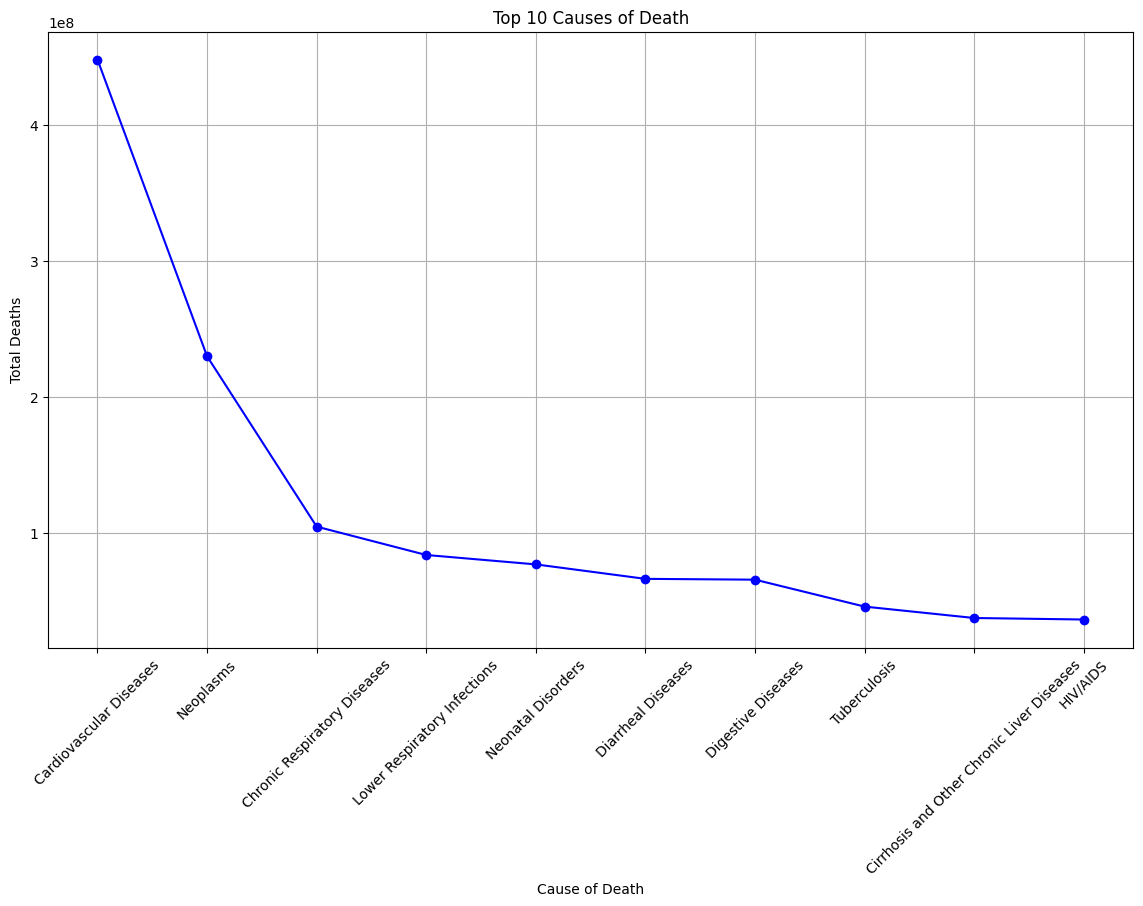

In [15]:
# Plotting the Line Graph
plt.figure(figsize=(14, 8))
plt.plot(top_ten_causes.index, top_ten_causes.values, marker='o', linestyle='-', color='b')
plt.title('Top 10 Causes of Death')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
# 5:which country has the highest number of deaths due to cardiovascular diseasees?
car_disease = dataset.groupby("Country/Territory")["Cardiovascular Diseases"].sum().sort_values(ascending=False).head(20)
print(car_disease)

Country/Territory
China             100505973
India              52994710
Russia             33903781
United States      26438346
Indonesia          13587011
Ukraine            13053052
Germany            10819770
Brazil              9589019
Japan               9210437
Pakistan            7745192
Italy               6614384
United Kingdom      6603062
Bangladesh          6123691
Egypt               5995471
Vietnam             5323920
Poland              5233134
France              4729313
Romania             4474916
Nigeria             4176488
Turkey              4167835
Name: Cardiovascular Diseases, dtype: int64


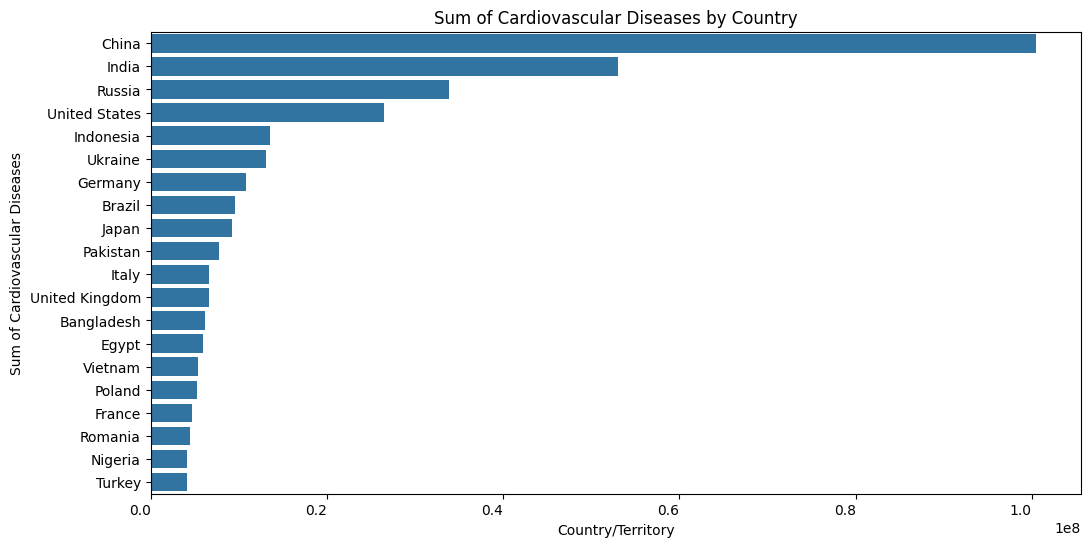

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=car_disease, y=car_disease.index, orient='h')
plt.title('Sum of Cardiovascular Diseases by Country')
plt.xlabel('Country/Territory')
plt.ylabel('Sum of Cardiovascular Diseases')
plt.xticks(ha='right')

plt.show()

In [18]:
# 6: how many deaths caused by each disease
cause_death_dataset = dataset.iloc[:,2:-1].sum().to_frame().reset_index()
cause_death_dataset.rename(columns={"index": "Causes", 0:"Death Count"}, inplace=True)
cause_death_dataset = cause_death_dataset.sort_values(by='Death Count',ascending=False)
print(cause_death_dataset)


                                        Causes  Death Count
12                     Cardiovascular Diseases    447741982
20                                   Neoplasms    229758538
27                Chronic Respiratory Diseases    104605334
13                Lower Respiratory Infections     83770038
14                          Neonatal Disorders     76860729
18                          Diarrheal Diseases     66235508
29                          Digestive Diseases     65638635
11                                Tuberculosis     45850603
28  Cirrhosis and Other Chronic Liver Diseases     37479321
9                                     HIV/AIDS     36364419
26                               Road Injuries     36296469
22                           Diabetes Mellitus     31448872
2      Alzheimer's Disease and Other Dementias     29768839
23                      Chronic Kidney Disease     28911692
5                                      Malaria     25342676
16                                   Sel

In [19]:
# 7: top 5 causes of deaths 
cause_death_dataset.iloc[:5]

,Causes,Death Count
12,Cardiovascular Diseases,447741982
20,Neoplasms,229758538
27,Chronic Respiratory Diseases,104605334
13,Lower Respiratory Infections,83770038
14,Neonatal Disorders,76860729


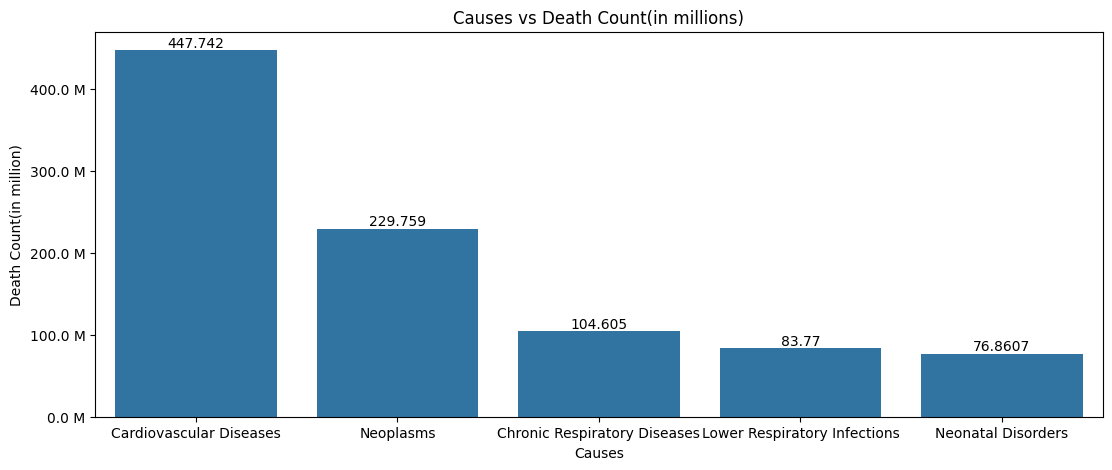

In [20]:
plt.figure(figsize=(13,5))
plt.title('Causes vs Death Count(in millions)')

def million_formatter(x, pos):
    return "%.1f M" % (x)

a = sns.barplot(x = cause_death_dataset.iloc[:5]['Causes'] , y = cause_death_dataset.iloc[:5]['Death Count']/1e6)

for i in a.containers:

    a.bar_label(i)

a.yaxis.set_major_formatter(million_formatter)
plt.xlabel('Causes')
plt.ylabel('Death Count(in million)')

plt.show()

In [21]:
# 8:Which country has the highest number of deaths caused by malaria?¶
malaria_disease = dataset.groupby("Country/Territory")["Malaria"].sum().sort_values(ascending=False).head(20)
print(malaria_disease)

Country/Territory
Nigeria                         6422063
Democratic Republic of Congo    2557219
India                           2439244
Uganda                          1265629
Burkina Faso                     950762
Cote d'Ivoire                    941597
Mozambique                       817948
Tanzania                         800490
Ghana                            721339
Mali                             711087
Niger                            693962
Cameroon                         614095
Ethiopia                         453985
Malawi                           404288
Sierra Leone                     394491
Guinea                           362660
Bangladesh                       349375
Burundi                          320767
Angola                           317069
Benin                            316834
Name: Malaria, dtype: int64


C:\Users\rashi\AppData\Local\Temp\ipykernel_744\2631443866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=malaria_disease, y=malaria_disease.index, palette='viridis', orient='h')


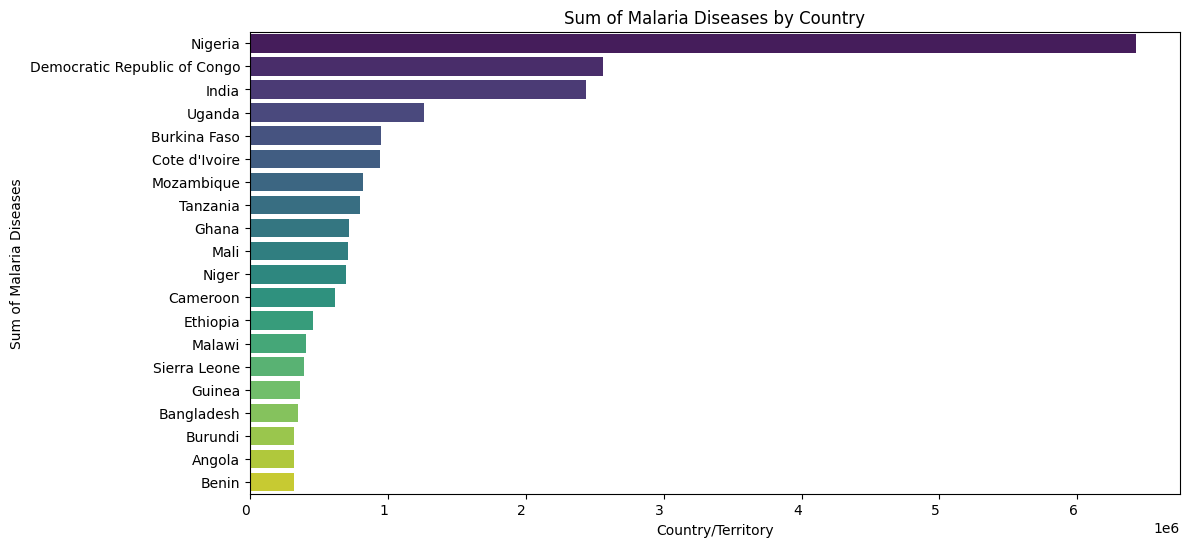

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=malaria_disease, y=malaria_disease.index, palette='viridis', orient='h')
plt.title('Sum of Malaria Diseases by Country')
plt.xlabel('Country/Territory')
plt.ylabel('Sum of Malaria Diseases')
plt.xticks(ha='right')

plt.show()

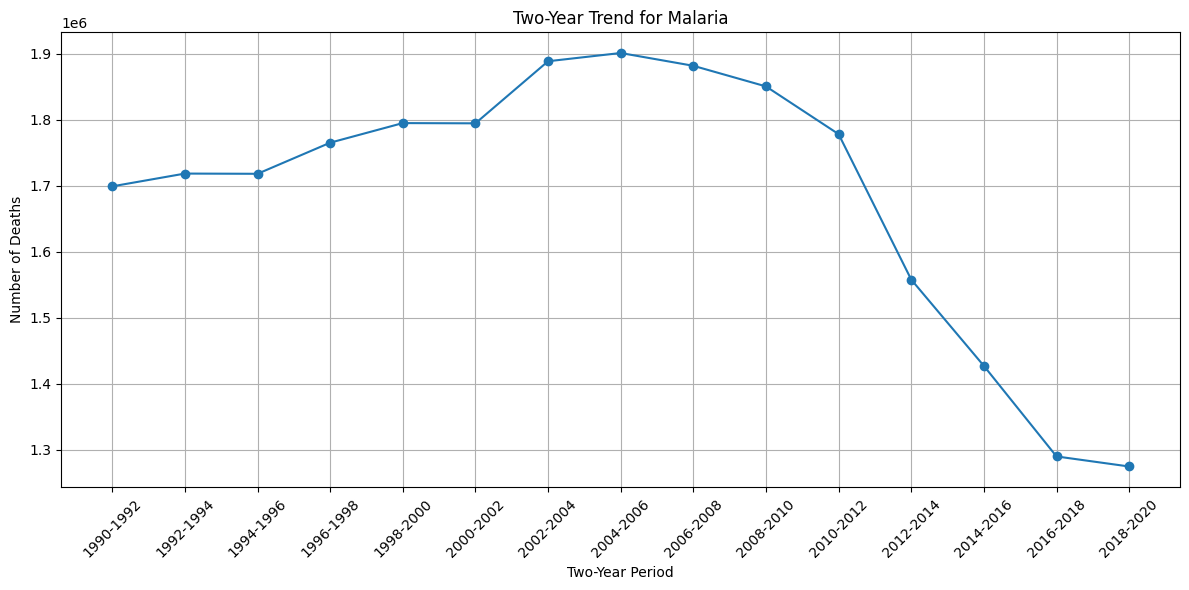

In [28]:
# 9: specific cause of deaths according to years

def plot_two_year_trend(dataset, cause_of_death):
    # Ensure 'Year' is in datetime format
    dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
    
    # Filter data from 1990 to 2020
    dataset = dataset[(dataset['Year'].dt.year >= 1990) & (dataset['Year'].dt.year <= 2020)]

    # Create a new column for two-year periods
    dataset['Two_Year_Period'] = ((dataset['Year'].dt.year - 1990) // 2) * 2 + 1990

    # Group by the new two-year period and aggregate the cause of death
    aggregated_data = dataset.groupby('Two_Year_Period')[cause_of_death].sum()

    # Plot the results
    plt.figure(figsize=(12, 6))
    aggregated_data.plot(marker='o')
    plt.title(f'Two-Year Trend for {cause_of_death}')
    plt.xlabel('Two-Year Period')
    plt.ylabel('Number of Deaths')
    plt.grid(True)
    plt.xticks(ticks=aggregated_data.index, labels=[f'{year}-{year+2}' for year in aggregated_data.index], rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function with the dataset and specific cause of death
plot_two_year_trend(dataset, 'Malaria')

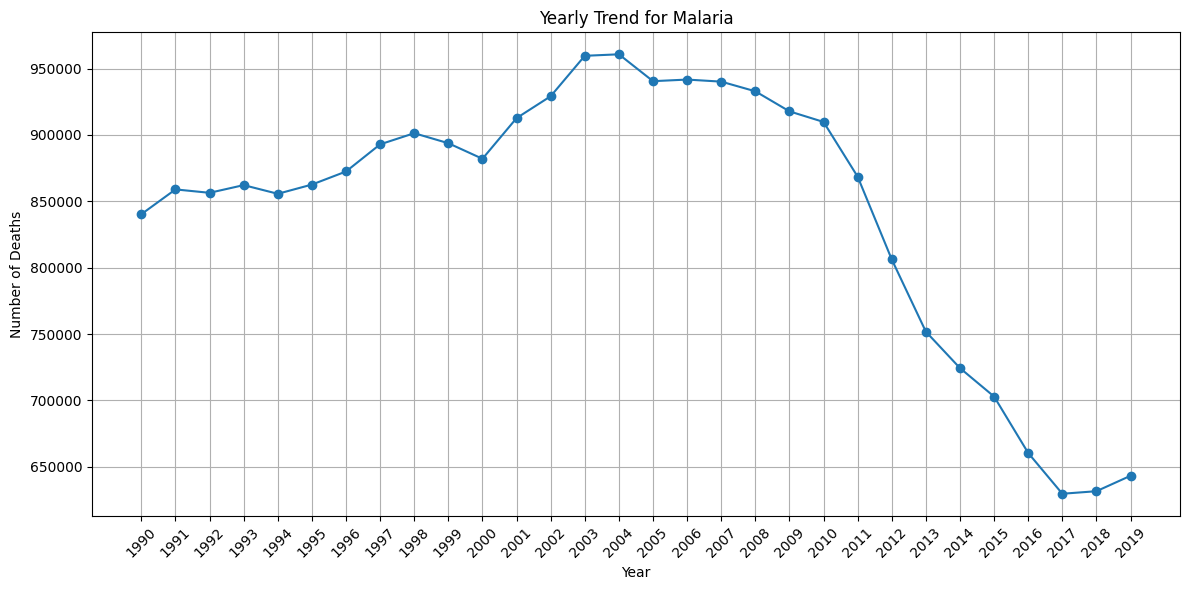

In [29]:
def plot_yearly_trend(dataset, cause_of_death):
    # Ensure 'Year' is in datetime format
    dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')

    # Filter data from 1990 to 2020
    dataset = dataset[(dataset['Year'].dt.year >= 1990) & (dataset['Year'].dt.year <= 2020)]

    # Group by year and aggregate the cause of death
    yearly_data = dataset.groupby(dataset['Year'].dt.year)[cause_of_death].sum()

    # Plot the results
    plt.figure(figsize=(12, 6))
    yearly_data.plot(marker='o')
    plt.title(f'Yearly Trend for {cause_of_death}')
    plt.xlabel('Year')
    plt.ylabel('Number of Deaths')
    plt.grid(True)
    plt.xticks(yearly_data.index, rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function with the dataset and specific cause of death
plot_yearly_trend(dataset, 'Malaria')

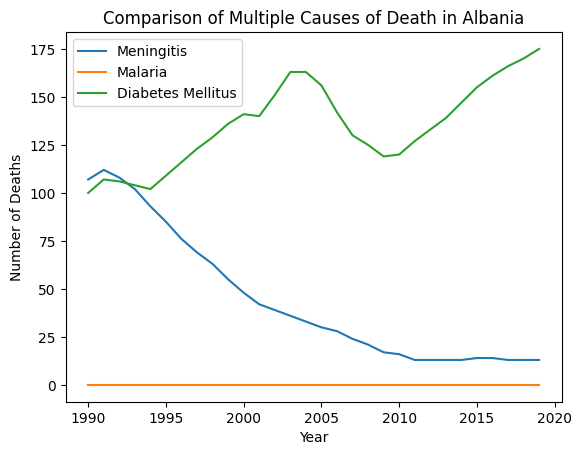

In [63]:
# 10: multiple causes of deaths in albania
causes = ['Meningitis', 'Malaria', 'Diabetes Mellitus']
albania_data = dataset[dataset['Country/Territory'] == 'Albania']
albania_data.groupby('Year')[causes].sum().plot()
plt.title('Comparison of Multiple Causes of Death in Albania')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

In [64]:
# 11: what is the percentage of diseases
deaths_causes = dataset.iloc[:, 3:].sum().sort_values(ascending = False)
deaths_causes_per = (deaths_causes.div(deaths_causes.sum()) * 100).round(2)
deaths_causes_per

Cardiovascular Diseases                       30.50
Neoplasms                                     15.65
Chronic Respiratory Diseases                   7.13
Lower Respiratory Infections                   5.71
Neonatal Disorders                             5.24
Diarrheal Diseases                             4.51
Digestive Diseases                             4.47
Tuberculosis                                   3.12
Cirrhosis and Other Chronic Liver Diseases     2.55
HIV/AIDS                                       2.48
Road Injuries                                  2.47
Diabetes Mellitus                              2.14
Alzheimer's Disease and Other Dementias        2.03
Chronic Kidney Disease                         1.97
Malaria                                        1.73
Self-harm                                      1.62
Nutritional Deficiencies                       0.94
Interpersonal Violence                         0.87
Protein-Energy Malnutrition                    0.82
Meningitis  

<Figure size 1400x1400 with 0 Axes>

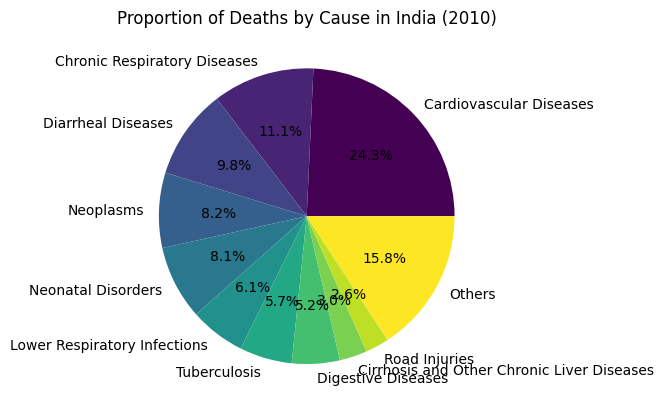

In [65]:
# 12: top 10 diseases that caused deaths in India
india_2010_data = dataset[(dataset['Country/Territory'] == 'India') & (dataset['Year'] == 2010)]


india_2010_data = india_2010_data.drop(columns=['Country/Territory', 'Code', 'Year'])


india_2010_data = india_2010_data.T
india_2010_data.columns = ['Deaths']


india_2010_data = india_2010_data.sort_values(by='Deaths', ascending=False)


top_10_causes = india_2010_data.head(10)


others = pd.DataFrame(india_2010_data.iloc[10:].sum()).T
others.index = ['Others']

india_2010_top_10 = pd.concat([top_10_causes, others])

# Plotting the pie chart
plt.figure(figsize=(14, 14))
india_2010_top_10.plot(kind='pie', y='Deaths', autopct='%1.1f%%', legend=False, colormap='viridis')
plt.title('Proportion of Deaths by Cause in India (2010)')
plt.ylabel('')
plt.show()

In [66]:
# 13: What is the trend in the number of deaths caused by Alzheimer’s disease and other dementias over the years?¶
Dementias_trend = dataset.groupby("Year")["Alzheimer's Disease and Other Dementias"].sum().reset_index()
print(Dementias_trend)

    Year  Alzheimer's Disease and Other Dementias
0   1990                                   560616
1   1991                                   583166
2   1992                                   605894
3   1993                                   629571
4   1994                                   652176
5   1995                                   674815
6   1996                                   696665
7   1997                                   717342
8   1998                                   738768
9   1999                                   761620
10  2000                                   786615
11  2001                                   814526
12  2002                                   845695
13  2003                                   877011
14  2004                                   909148
15  2005                                   945619
16  2006                                   982308
17  2007                                  1022057
18  2008                                  1065297


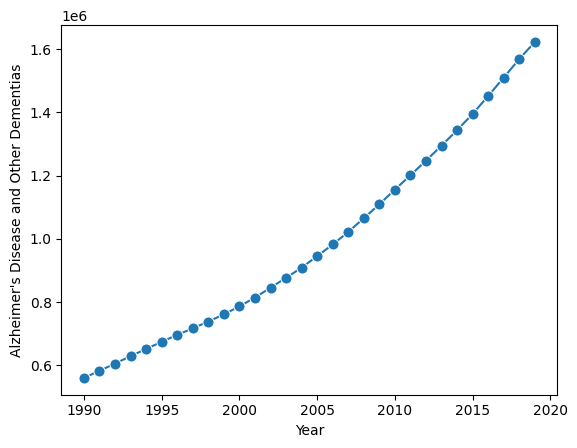

In [67]:
sns.lineplot(x='Year', y="Alzheimer's Disease and Other Dementias", data=Dementias_trend, marker='o', markersize=8);

In [68]:
# 14: Summing up the deaths from Nutritional Deficiencies across all countries for each year
nutritional_deficiencies_trend = dataset.groupby('Year')['Nutritional Deficiencies'].sum()
print(nutritional_deficiencies_trend)

Year
1990    756808
1991    729145
1992    700664
1993    674219
1994    649801
1995    723095
1996    671977
1997    647682
1998    620498
1999    593417
2000    568454
2001    542565
2002    517754
2003    417264
2004    393952
2005    376740
2006    362476
2007    347407
2008    335623
2009    322879
2010    322187
2011    314327
2012    298117
2013    291451
2014    284578
2015    278793
2016    273191
2017    267463
2018    258094
2019    251411
Name: Nutritional Deficiencies, dtype: int64


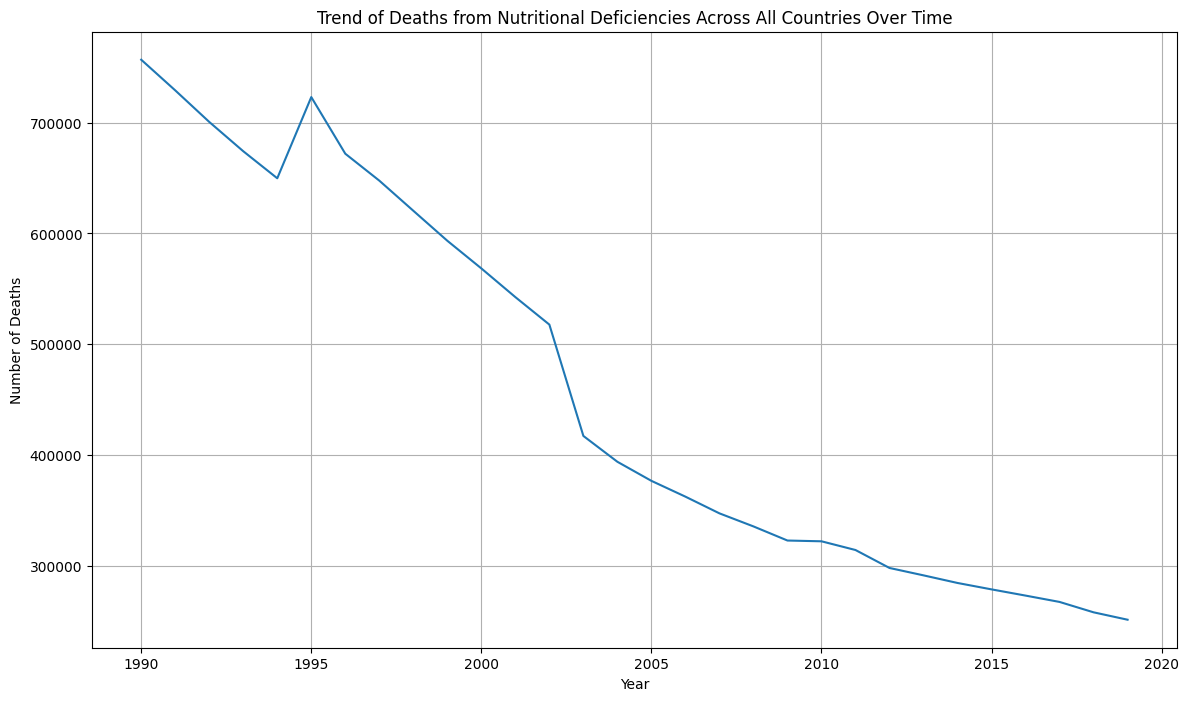

In [69]:
plt.figure(figsize=(14, 8))
plt.plot(nutritional_deficiencies_trend.index, nutritional_deficiencies_trend.values)
plt.title('Trend of Deaths from Nutritional Deficiencies Across All Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

In [70]:
# 15: Disease count over years _ Top 5 countries
car_disease = dataset.groupby("Country/Territory")["Cardiovascular Diseases"].sum().sort_values(ascending=False).head(20)
print(car_disease)

Country/Territory
China             100505973
India              52994710
Russia             33903781
United States      26438346
Indonesia          13587011
Ukraine            13053052
Germany            10819770
Brazil              9589019
Japan               9210437
Pakistan            7745192
Italy               6614384
United Kingdom      6603062
Bangladesh          6123691
Egypt               5995471
Vietnam             5323920
Poland              5233134
France              4729313
Romania             4474916
Nigeria             4176488
Turkey              4167835
Name: Cardiovascular Diseases, dtype: int64


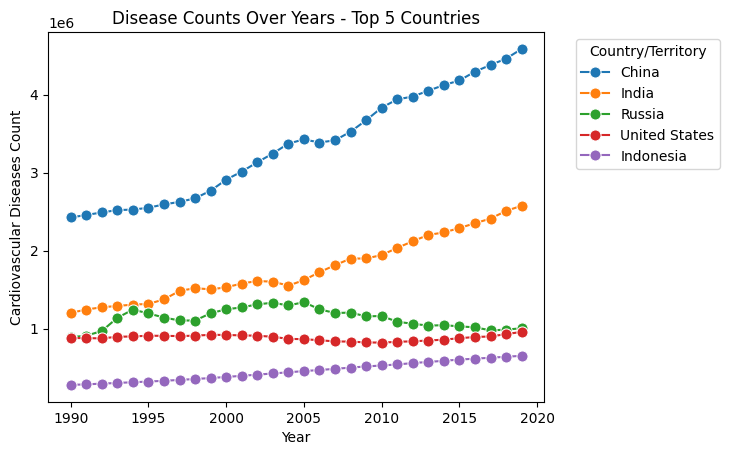

In [71]:
for country in car_disease.index[:5] :
    selected_country_data = dataset[dataset['Country/Territory'] == country]
    sns.lineplot(x='Year', y='Cardiovascular Diseases', data=selected_country_data, label=country, marker='o', markersize=8)
plt.title('Disease Counts Over Years - Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Cardiovascular Diseases Count')
plt.legend(title='Country/Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [151]:
def calculate_yearly_percentage_change(data, cause):
    data['Percentage Change'] = data[cause].pct_change() * 100
    return data

# Filter data for all countries
all_countries_data = dataset.copy()

# Calculate yearly percentage change for Cardiovascular Diseases
all_countries_data = all_countries_data.groupby('Country/Territory').apply(calculate_yearly_percentage_change, cause='Cardiovascular Diseases')


C:\Users\rashi\AppData\Local\Temp\ipykernel_22024\2695614629.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_countries_data = all_countries_data.groupby('Country/Territory').apply(calculate_yearly_percentage_change, cause='Cardiovascular Diseases')


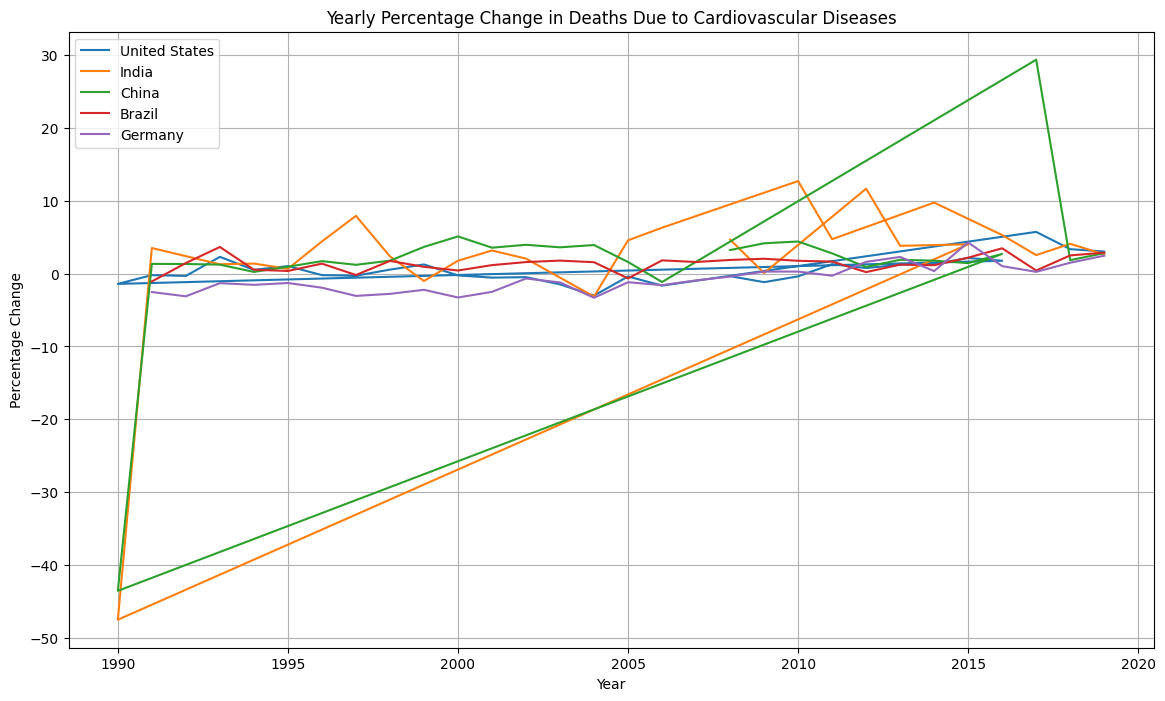

In [152]:
# Plotting the yearly percentage change
plt.figure(figsize=(14, 8))
for country in selected_countries:
    country_data = all_countries_data[all_countries_data['Country/Territory'] == country]
    plt.plot(country_data['Year'], country_data['Percentage Change'], label=country)

plt.title('Yearly Percentage Change in Deaths Due to Cardiovascular Diseases')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# 17: top 5 lowest countries in 2015 which death are caused by "Cirrhosis" and other "Chronic liver disease"
# Filter data for the year 2015
dataset_2015 = dataset[dataset['Year'] == 2015]

# Find the top 5 countries with the lowest deaths for "Cirrhosis and Other Chronic Liver Diseases" in 2015
top_5_countries_2015 = dataset_2015[['Country/Territory', 'Cirrhosis and Other Chronic Liver Diseases']].nsmallest(5, 'Cirrhosis and Other Chronic Liver Diseases')


print(top_5_countries_2015)

     Country/Territory  Cirrhosis and Other Chronic Liver Diseases
3925              Niue                                           0
5515           Tokelau                                           0
1255      Cook Islands                                           2
3715             Nauru                                           2
5695            Tuvalu                                           2


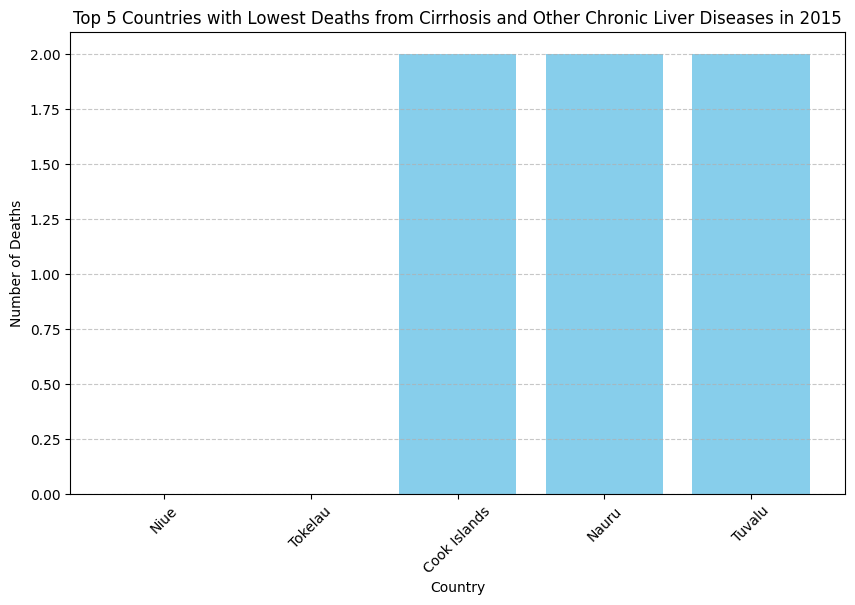

     Country/Territory  Cirrhosis and Other Chronic Liver Diseases
3925              Niue                                           0
5515           Tokelau                                           0
1255      Cook Islands                                           2
3715             Nauru                                           2
5695            Tuvalu                                           2


In [75]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries_2015['Country/Territory'], top_5_countries_2015['Cirrhosis and Other Chronic Liver Diseases'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Top 5 Countries with Lowest Deaths from Cirrhosis and Other Chronic Liver Diseases in 2015')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(top_5_countries_2015)

<Figure size 1400x800 with 0 Axes>

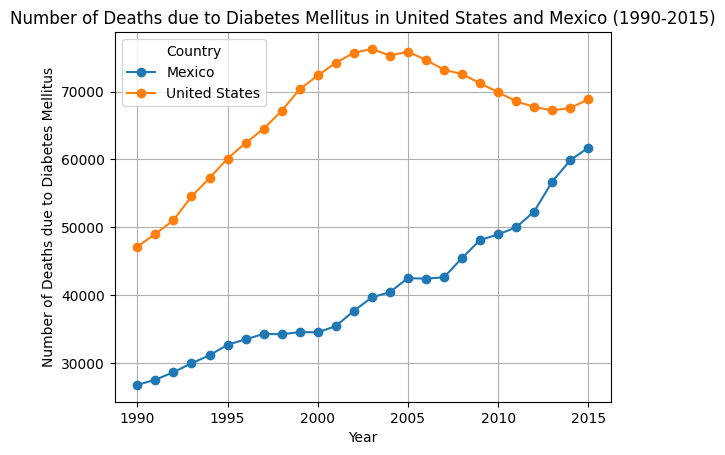

In [76]:
# 18: Compare the number of deaths due to diabetes mellitus between the United States and Mexico from 1990 to 2015 
# Define the countries and the disease
countries = ['United States', 'Mexico']
disease = 'Diabetes Mellitus'
start_year = 1990
end_year = 2015

# Filter the dataset for the United States and Mexico, and the years 1990 to 2015
filtered_data = dataset[(dataset['Country/Territory'].isin(countries)) & 
                        (dataset['Year'] >= start_year) & 
                        (dataset['Year'] <= end_year)]

# Extract the relevant columns
filtered_data = filtered_data[['Country/Territory', 'Year', disease]]

# Pivot the data for better plotting
pivot_data = filtered_data.pivot(index='Year', columns='Country/Territory', values=disease)

# Plot the data
plt.figure(figsize=(14, 8))
pivot_data.plot(marker='o', linestyle='-')
plt.title(f'Number of Deaths due to {disease} in United States and Mexico (1990-2015)')
plt.xlabel('Year')
plt.ylabel(f'Number of Deaths due to {disease}')
plt.grid(True)
plt.legend(title='Country')
plt.show()

<Figure size 1400x800 with 0 Axes>

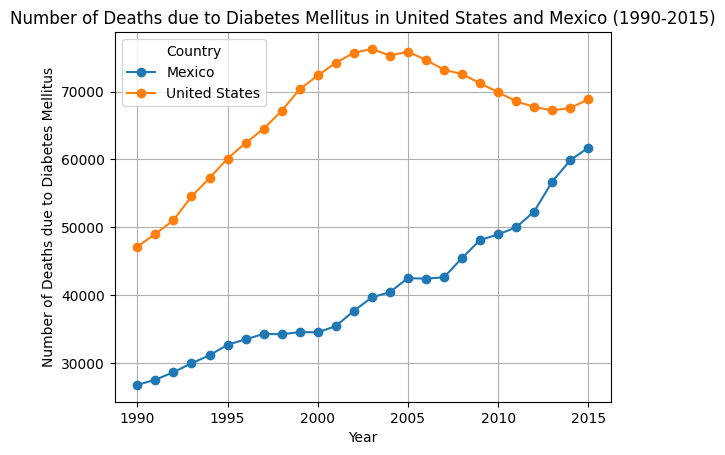

In [77]:
# 19: Number of deaths due to Diabetis in United states and Maxico
countries = ['United States', 'Mexico']
disease = 'Diabetes Mellitus'
start_year = 1990
end_year = 2015

# Filter the dataset for the specified countries and years
filtered_data = dataset[(dataset['Country/Territory'].isin(countries)) & 
                        (dataset['Year'] >= start_year) & 
                        (dataset['Year'] <= end_year)]

# Extract the relevant columns
filtered_data = filtered_data[['Country/Territory', 'Year', disease]]

# Pivot the data for better plotting
pivot_data = filtered_data.pivot(index='Year', columns='Country/Territory', values=disease)

# Plot the line graph
plt.figure(figsize=(14, 8))
pivot_data.plot(marker='o', linestyle='-')
plt.title(f'Number of Deaths due to {disease} in United States and Mexico (1990-2015)')
plt.xlabel('Year')
plt.ylabel(f'Number of Deaths due to {disease}')
plt.grid(True)
plt.legend(title='Country')
plt.show()

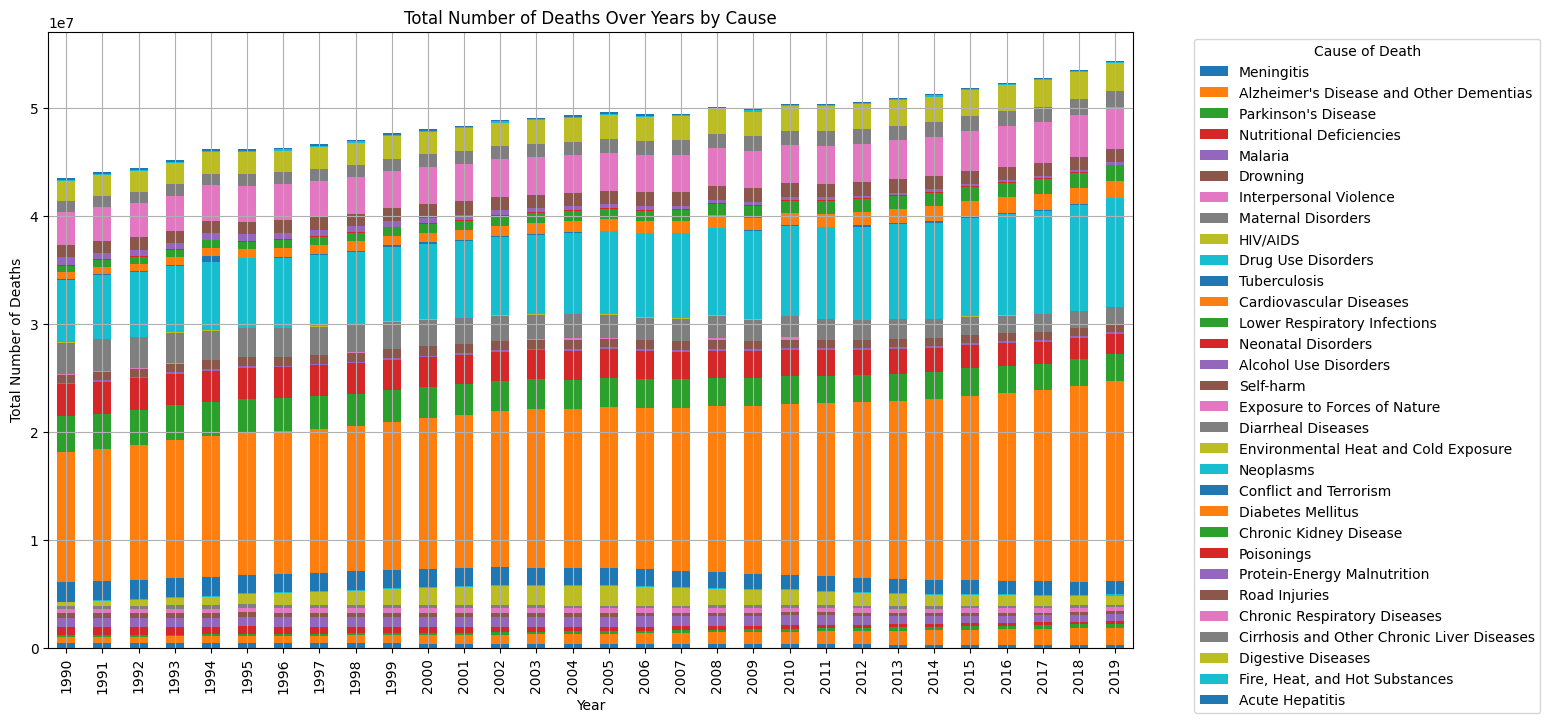

In [78]:
# 21: total number of deaths over year by cause(diesease)
causes_of_death = dataset.columns[3:]  # Exclude 'Country/Territory', 'Code', 'Year'

# Group by year and sum the total deaths for each cause
deaths_by_year_and_cause = dataset.groupby('Year')[causes_of_death].sum()

# Plotting the stacked bar chart
deaths_by_year_and_cause.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Number of Deaths Over Years by Cause')
plt.xlabel('Year')
plt.ylabel('Total Number of Deaths')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [79]:
# 22: which diseases cause the lowest death in countries from 1990 to 2019
# Define the causes of death columns
causes_of_death = dataset.columns[3:]  # Exclude 'Country/Territory', 'Code', 'Year'

# Remove the 'Month' column if present
causes_of_death = [col for col in causes_of_death if col != 'Month']

# Sum the total deaths for each cause across all years and countries
total_deaths_by_cause = dataset[causes_of_death].select_dtypes(include='number').sum().sort_values()

# Identify the causes with the lowest total deaths
lowest_death_causes = total_deaths_by_cause.head(10)  # Adjust the number if needed

# Displaying the causes with the lowest total deaths
print("Causes of Death with the Lowest Total Deaths from 1990 to 2019:")
print(lowest_death_causes)


Causes of Death with the Lowest Total Deaths from 1990 to 2019:
Exposure to Forces of Nature            1490132
Environmental Heat and Cold Exposure    1788851
Poisonings                              2601082
Drug Use Disorders                      2656121
Conflict and Terrorism                  3294053
Fire, Heat, and Hot Substances          3602914
Acute Hepatitis                         3784791
Alcohol Use Disorders                   4819018
Parkinson's Disease                     7179795
Maternal Disorders                      7727046
dtype: int64


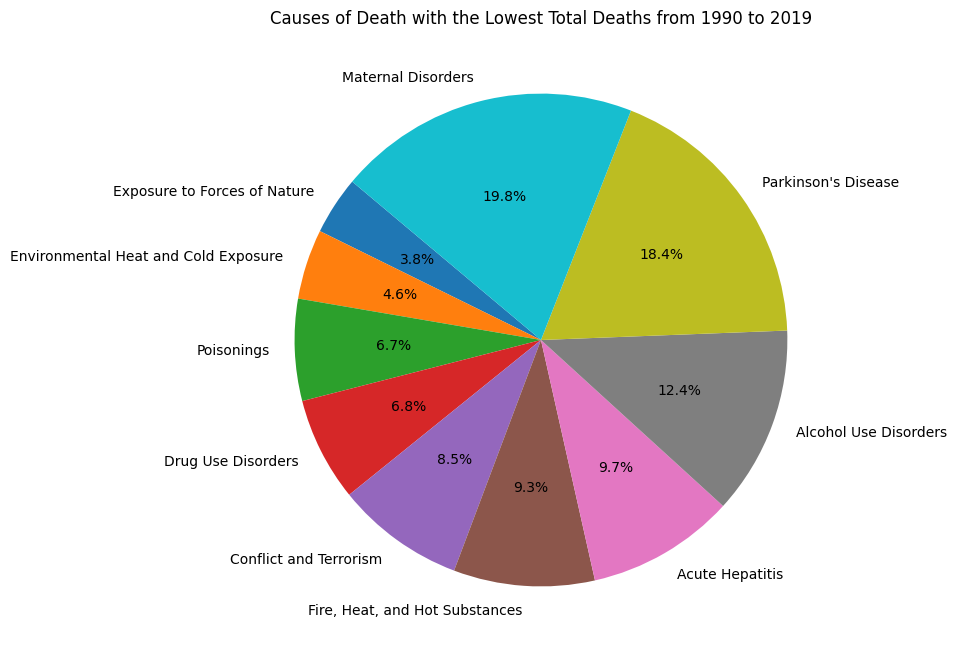

In [80]:
# Plotting the pie chart for the causes of death with the lowest total deaths
plt.figure(figsize=(14, 8))
lowest_death_causes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Causes of Death with the Lowest Total Deaths from 1990 to 2019')
plt.ylabel('')
plt.show()

In [91]:
#confusion matrics
# Assume 'Meningitis' and 'Malaria' are the actual and predicted labels
actual = dataset['Meningitis']
predicted = dataset['Malaria']

In [93]:
# Define bins for classification based on the range of the data
bins = [0, 1000, 5000, 10000, max(dataset['Meningitis'].max(), dataset['Malaria'].max())]
labels = ['Low', 'Medium', 'High', 'Very High']

In [94]:
# Combine both series into a DataFrame to drop NaNs consistently
combined = pd.DataFrame({'Actual': actual_binned, 'Predicted': predicted_binned}).dropna()


In [95]:
# Create the confusion matrix
cm = confusion_matrix(combined['Actual'], combined['Predicted'], labels=labels)

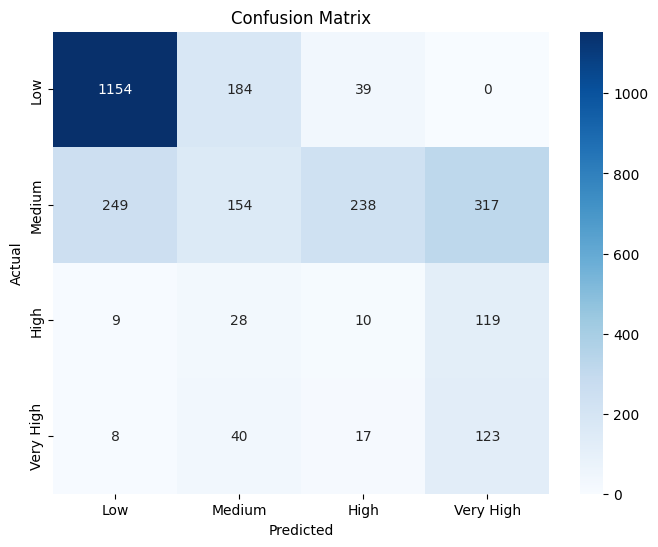

In [96]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
#Calculate Z-Scores for a Specific Column
*# For demonstration, let's calculate the Z-score for the 'Meningitis' column
dataset['Meningitis_Z_Score'] = zscore(dataset['Meningitis'])

# Display the first few rows to see the Z-scores
dataset[['Country/Territory', 'Year', 'Meningitis', 'Meningitis_Z_Score']].head()

,Country/Territory,Year,Meningitis,Meningitis_Z_Score
0,Afghanistan,1990,2159,0.065847
1,Afghanistan,1991,2218,0.074691
2,Afghanistan,1992,2475,0.113213
3,Afghanistan,1993,2812,0.163727
4,Afghanistan,1994,3027,0.195954


In [104]:
#Calculate Z-Scores for Multiple Columns
# List of columns to calculate Z-scores for
columns_to_standardize = ['Meningitis', 'Malaria', 'Drowning']

# Apply Z-score calculation to each column in the list
for column in columns_to_standardize:
    dataset[f'{column}_Z_Score'] = zscore(dataset[column])

# Display the first few rows to see the Z-scores
dataset[['Country/Territory', 'Year'] + [f'{col}_Z_Score' for col in columns_to_standardize]].head()

,Country/Territory,Year,Meningitis_Z_Score,Malaria_Z_Score,Drowning_Z_Score
0,Afghanistan,1990,0.065847,-0.219684,-0.035300
1,Afghanistan,1991,0.074691,-0.214474,-0.032934
2,Afghanistan,1992,0.113213,-0.211761,-0.019077
3,Afghanistan,1993,0.163727,-0.218870,0.000413
4,Afghanistan,1994,0.195954,-0.213281,0.014158


In [107]:
#performing t_test between two colums
meningitis = dataset['Meningitis']
malaria = dataset['Malaria']

# Perform the t-test
t_stat, p_value = ttest_ind(meningitis, malaria)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -9.664870494411428
P-Value: 5.095785431401243e-22


In [111]:
# Select data for two different years
year_1990 = dataset[dataset['Year'] == 1990]['Meningitis']
year_2000 = dataset[dataset['Year'] == 2000]['Meningitis']

# Perform the paired t-test
t_stat, p_value = ttest_rel(year_1990, year_2000)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 1.4131051260766203
P-Value: 0.15915627252089187


In [115]:
# Selecting the 3rd column ('Meningitis') and 8th column ('Malaria') for prediction
X = dataset.iloc[:, 2]  # 3rd column (index 2)
y = dataset.iloc[:, 7]  # 8th column (index 7)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y, X)

# Print the MSE value
print(f"Mean Squared Error (MSE) between 'Meningitis' and 'Malaria': {mse:.2f}")


Mean Squared Error (MSE) between 'Meningitis' and 'Malaria': 344096227.18


In [117]:
# ROC curve
# Create a binary classification based on a threshold
# For example, if 'Meningitis' deaths are greater than 3000, label it as 1, otherwise 0
threshold = 3000
dataset['Meningitis_Binary'] = (dataset['Meningitis'] > threshold).astype(int)


In [118]:
# Assume 'Malaria' is the predicted probability (this is hypothetical)
predicted_probabilities = dataset['Malaria'] / dataset['Malaria'].max()


In [120]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(dataset['Meningitis_Binary'], predicted_probabilities)
roc_auc = auc(fpr, tpr)


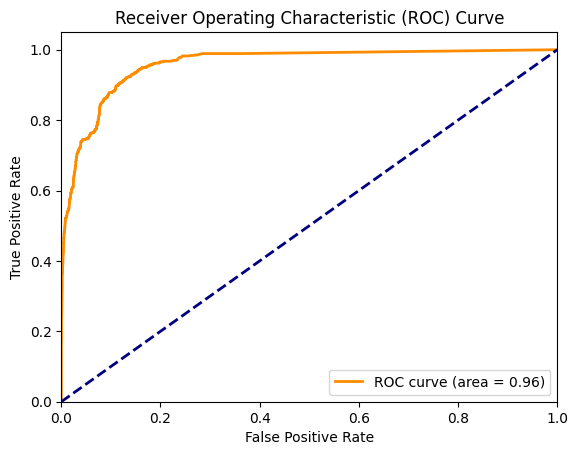

In [121]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [122]:
#P-Value from a T-Test
# Compare 'Meningitis' and 'Malaria' columns
meningitis = dataset['Meningitis']
malaria = dataset['Malaria']


In [124]:
# Perform a two-sample t-test
t_stat, p_value = ttest_ind(meningitis, malaria)
# Output the p-value
print("P-Value:",p_value)

P-Value: 5.095785431401243e-22


In [125]:
# Calculate Precision, Recall, and F1-Score
# Create binary labels for a hypothetical classification problem
# For example, let's say deaths due to 'Meningitis' greater than a threshold are classified as 1, otherwise 0
threshold = 3000
dataset['Meningitis_Binary'] = (dataset['Meningitis'] > threshold).astype(int)


In [126]:
# Use 'Malaria' values as a proxy for predictions, thresholded to create binary predictions
predicted_threshold = 1000
dataset['Malaria_Binary'] = (dataset['Malaria'] > predicted_threshold).astype(int)


In [129]:
# Calculate Precision, Recall, and F1-Score
precision = precision_score(dataset['Meningitis_Binary'], dataset['Malaria_Binary'])
recall = recall_score(dataset['Meningitis_Binary'], dataset['Malaria_Binary'])
f1 = f1_score(dataset['Meningitis_Binary'], dataset['Malaria_Binary'])


In [130]:
# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.52
Recall: 0.90
F1-Score: 0.66


In [132]:
#Implementing Cross-Validation
# Create binary labels for the classification problem
# Example: Meningitis deaths greater than 3000 are classified as 1, otherwise 0
dataset['Meningitis_Binary'] = (dataset['Meningitis'] > 3000).astype(int)


In [133]:
# Select features and target
X = dataset[['Malaria']]  # Using 'Malaria' as the feature for simplicity
y = dataset['Meningitis_Binary']


In [134]:
# Initialize a logistic regression model
model = LogisticRegression()



In [141]:
# Perform 5-fold cross-validation
# We can calculate and print different scores such as precision, recall, and F1
cv_precision = cross_val_score(model, X, y, cv=5, scoring = make_scorer(precision_score))
cv_recall = cross_val_score(model, X, y, cv=5, scoring = make_scorer(recall_score))
cv_f1 = cross_val_score(model, X, y, cv=5, scoring = make_scorer(f1_score))


In [142]:
# Print the average scores across the folds
print(f"Precision (CV): {cv_precision.mean():.2f}")
print(f"Recall (CV): {cv_recall.mean():.2f}")
print(f"F1-Score (CV): {cv_f1.mean():.2f}")

Precision (CV): 0.83
Recall (CV): 0.56
F1-Score (CV): 0.65
